# Make sequential images for Figure 3a  
Data: 3D blue and green channel images

## Libraries

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

## Functions

In [1]:
def set_scalebar(ax, size, x_scale, vsize=2, borderpad=1, loc='lower right'):
    '''
    Set a scalebar in a image
    
    size: size in micrometers
    vsize: width of scale bar
    borderpad: distance of scale bar to edge of image
    '''
    scalebar = AnchoredSizeBar(ax.transData, size=size/x_scale, label='',
                               loc=loc, frameon=False, color='white', size_vertical=vsize, borderpad=borderpad, label_top=True,
                               fontproperties=fm.FontProperties(size=12))
    ax.add_artist(scalebar)

## Directories

In [2]:
data = '../data/3D/'
result = '../result/'

## Make sequential images

In [3]:
file_405 = 'id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_405.fits'
file_488 = 'id551_MDCK_unit_acousticon_sheathon_01_200Hz_405_250mW_488_150mW_488.fits'

In [14]:
img_405 = fits.getdata(data+file_405)
img_488 = fits.getdata(data+file_488)

In [15]:
img_405.shape

(819, 512, 2560)

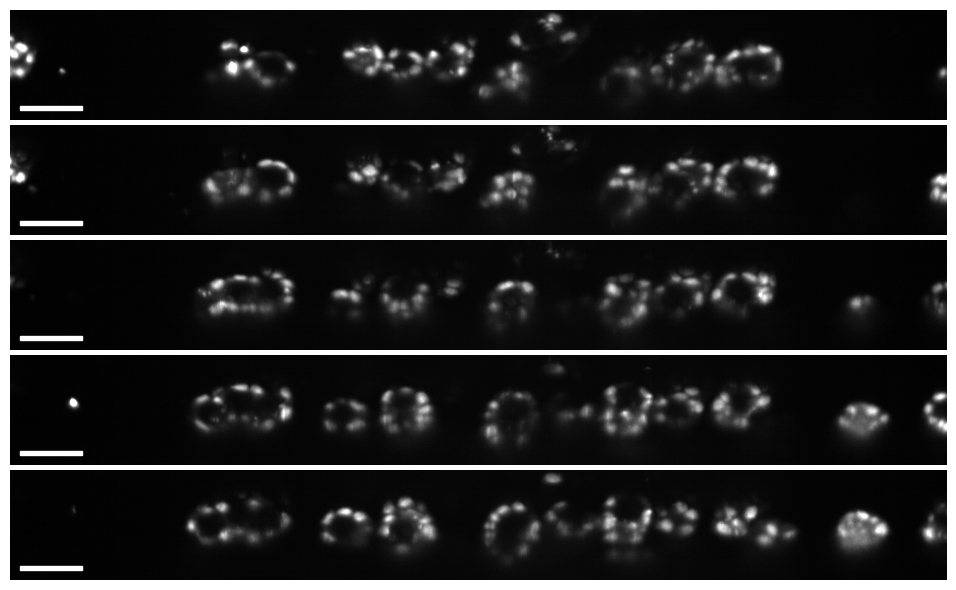

In [33]:
fig, axes = plt.subplots(5, 1, figsize=(10, 6))
fig.subplots_adjust(hspace=-0.1)
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.imshow(np.flip(img_405[678+i*2, 20:320, :], axis=1), cmap='gray', vmin=100, vmax=1200)
    ax.axis('off')

    set_scalebar(ax, size=50, x_scale=0.295, vsize=10, borderpad=0.5, loc='lower left')

plt.tight_layout()
plt.savefig('../result/id551_sequential_405.pdf', pad_inches=0.05)

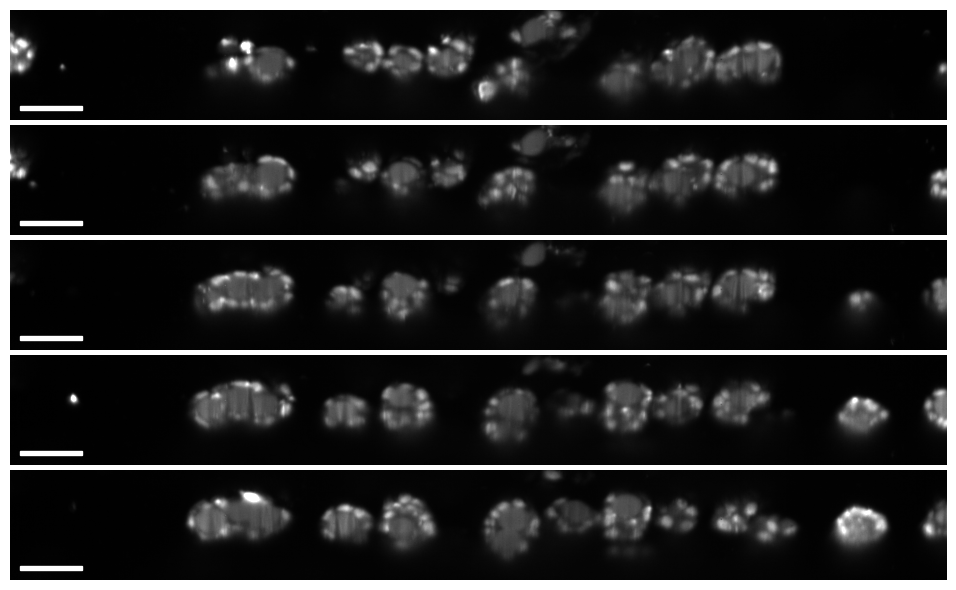

In [34]:
fig, axes = plt.subplots(5, 1, figsize=(10, 6))
fig.subplots_adjust(hspace=-0.1)
axes = axes.ravel()

for i, ax in enumerate(axes):
    ax.imshow(np.flip(img_488[678+i*2, 20:320, :], axis=1), cmap='gray', vmin=100, vmax=3000)
    ax.axis('off')

    set_scalebar(ax, size=50, x_scale=0.295, vsize=10, borderpad=0.5, loc='lower left')
    
plt.tight_layout()
plt.savefig('../result/id551_sequential_488.pdf', pad_inches=0.05)